Solving TSP for 42 cities...
Best tour for 42 cities: [(97.36201698259451, 39.38685077792431), (91.50378026867524, 37.026584090059224), (85.33765269446991, 45.63502735611191), (68.77239302047383, 54.70697813557466), (34.22004510595528, 72.96031568428923), (2.8444218098718, 72.968110351753), (0.26454384648038065, 68.85478100482435), (22.470281057163366, 28.44406312077501), (27.912517053774778, 27.983806060762372), (41.054223183875294, 20.49437396616768), (44.324603612365465, 18.097206129268095), (35.91475539905562, 8.265511522261725), (42.25955385024939, 6.5898490601308595), (70.55697740459483, 7.129790065673392), (69.83495046700557, 10.280897248557642), (72.93136657749506, 12.135754981113367), (62.38796346880435, 18.68396355704175), (62.259345607070316, 24.06414419210502), (85.49442987043518, 50.97795500500234), (99.65396204814564, 61.058618418144995), (82.43558421080024, 64.82354340101215), (84.22319761943852, 77.4933373243143), (92.2823046919182, 87.8784316795913), (86.0919269426285,

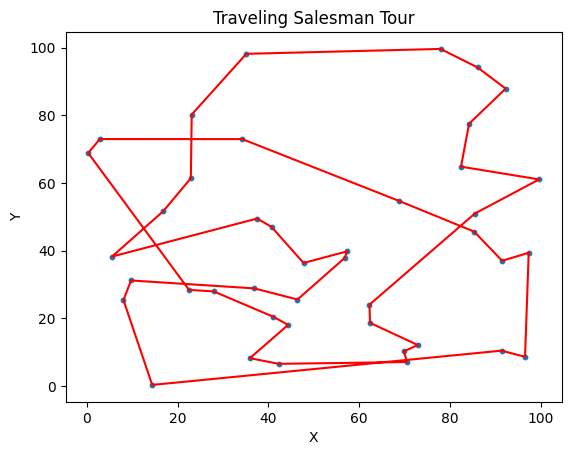


Solving TSP for 512 cities...
Best tour for 512 cities: [(22.021884826050954, 7.6577452120866525), (0.39433235024224356, 16.100777320760418), (7.991260189223748, 42.59691950748512), (12.989166712741774, 45.210294519163185), (25.112849725857334, 65.73529214888164), (27.187678920517587, 90.35015133671266), (23.77250378852318, 89.81354545614795), (2.7374375182748656, 99.43896748171134), (4.217641284167916, 95.48348269239469), (6.107469541474886, 69.3949868211747)]...
Total distance: 10932.851919869428

Solving TSP for 662 cities...
Best tour for 662 cities: [(38.44066890585112, 83.5310402104722), (30.182800110052966, 88.46446379564289), (15.465968713067536, 83.55311515335875), (1.7370281994243508, 84.15013329359623), (0.49064323353985584, 80.16407013258117), (22.74940590982969, 90.84591313619758), (3.703422101945042, 87.30260689488675), (84.34999005054644, 96.98849955927335), (97.05754292943152, 82.44350854722701), (92.02985183873143, 75.64237969222445)]...
Total distance: 15327.26059826

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Generate random dataset
def generate_dataset(num_cities, min_x=0, max_x=100, min_y=0, max_y=100):
    cities = [(random.uniform(min_x, max_x), random.uniform(min_y, max_y)) for _ in range(num_cities)]
    return cities

# Save dataset to a file
def save_dataset(filename, cities):
    with open(filename, 'w') as f:
        for city in cities:
            f.write(f"{city[0]} {city[1]}\n")

# Load dataset
def load_dataset(filename):
    with open(filename, 'r') as f:
        dataset = f.readlines()

    cities = []
    for line in dataset:
        x, y = map(float, line.strip().split())
        cities.append((x, y))

    return cities

# Calculate the Euclidean distance between two cities
def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# Generate an initial population
def initialize_population(cities, population_size):
    population = []
    for _ in range(population_size):
        individual = list(range(len(cities)))
        random.shuffle(individual)
        population.append(individual)
    return population

# Fitness function
def fitness(individual, cities):
    total_distance = 0
    for i in range(len(individual)):
        city1 = cities[individual[i]]
        city2 = cities[individual[(i + 1) % len(individual)]]
        total_distance += distance(city1, city2)
    return 1 / total_distance  # Maximize fitness

# Selection (tournament selection)
def selection(population, cities, k=3):
    tournament = random.sample(population, k)
    return max(tournament, key=lambda x: fitness(x, cities))

# Crossover (ordered crossover)
def crossover(parent1, parent2):
    start, end = sorted(random.sample(range(len(parent1)), 2))
    child = [None] * len(parent1)
    child[start:end] = parent1[start:end]
    remaining = [gene for gene in parent2 if gene not in child]
    indices = [i for i in range(len(child)) if child[i] is None]
    for i, gene in zip(indices, remaining):
        child[i] = gene
    return child

# Mutation (swap mutation)
def mutation(individual, mutation_rate=0.1):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Genetic algorithm
def genetic_algorithm(cities, population_size, generations, mutation_rate):
    population = initialize_population(cities, population_size)

    for generation in range(generations):
        # Selection
        parents = [selection(population, cities) for _ in range(population_size)]

        # Crossover and mutation
        offspring = []
        for i in range(0, population_size, 2):
            parent1, parent2 = parents[i], parents[i+1]
            child1, child2 = crossover(parent1, parent2), crossover(parent2, parent1)
            child1, child2 = mutation(child1, mutation_rate), mutation(child2, mutation_rate)
            offspring.extend([child1, child2])

        # Update population
        population = offspring

    # Find the best individual
    best_individual = max(population, key=lambda x: fitness(x, cities))
    best_fitness = fitness(best_individual, cities)
    best_tour = [cities[gene] for gene in best_individual]

    return best_tour, best_fitness

# Visualize the tour
def visualize_tour(cities, tour):
    x_coords = [city[0] for city in tour]
    y_coords = [city[1] for city in tour]

    plt.scatter(x_coords, y_coords, s=10)
    plt.plot(x_coords + [x_coords[0]], y_coords + [y_coords[0]], 'r-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Traveling Salesman Tour')
    plt.show()

# Main function
def main():
    # Generate and save datasets
    dataset_42 = generate_dataset(42)
    dataset_512 = generate_dataset(512)
    dataset_662 = generate_dataset(662)

    save_dataset('dataset_42.txt', dataset_42)
    save_dataset('dataset_512.txt', dataset_512)
    save_dataset('dataset_662.txt', dataset_662)

    # Load datasets
    dataset_42 = load_dataset('dataset_42.txt')
    dataset_512 = load_dataset('dataset_512.txt')
    dataset_662 = load_dataset('dataset_662.txt')

    # Genetic algorithm parameters
    population_size = 100
    generations = 1000
    mutation_rate = 0.1

    # Solve TSP for 42 cities
    print("Solving TSP for 42 cities...")
    best_tour_42, best_fitness_42 = genetic_algorithm(dataset_42, population_size, generations, mutation_rate)
    print(f"Best tour for 42 cities: {best_tour_42}")
    print(f"Total distance: {1 / best_fitness_42}")
    visualize_tour(dataset_42, best_tour_42)

    # Solve TSP for 512 cities
    print("\nSolving TSP for 512 cities...")
    best_tour_512, best_fitness_512 = genetic_algorithm(dataset_512, population_size, generations, mutation_rate)
    print(f"Best tour for 512 cities: {best_tour_512[:10]}...") # Print first 10 cities
    print(f"Total distance: {1 / best_fitness_512}")

    # Solve TSP for 662 cities
    print("\nSolving TSP for 662 cities...")
    best_tour_662, best_fitness_662 = genetic_algorithm(dataset_662, population_size, generations, mutation_rate)
    print(f"Best tour for 662 cities: {best_tour_662[:10]}...") # Print first 10 cities
    print(f"Total distance: {1 / best_fitness_662}")

if __name__ == "__main__":
    main()